In [82]:
import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [84]:
# df = data frame
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5010,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
2976,ham,"Ok omw now, you at castor?",NaN,NaN,NaN
306,ham,Jos ask if u wana meet up?,NaN,NaN,NaN
2870,ham,I actually did for the first time in a while. ...,NaN,NaN,NaN
4951,spam,"Welcome to Select, an O2 service with added be...",NaN,NaN,NaN
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....,NaN,NaN,NaN
2553,ham,ÌÏ give me some time to walk there.,NaN,NaN,NaN


In [85]:
df.shape # gives no of rows nd columns

(5572, 5)

In [86]:
# It will be a 7 step process
# Data Cleaning
# EDA exploratory Data Analysis -- Develops basic understanding of Data
# Text preprocesssing
# Model training
# Model evaluation
# improvements
# website and deploy

## **1.Data Cleaning**

In [87]:
# First let's see which data is useful and which is not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
# As we have seen that columns Unnamed do not have usefull values and mostly null values let's drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) # inplace true means we are permanently deleting them

In [89]:
df.sample(5)

,v1,v2
899,spam,Your free ringtone is waiting to be collected....
589,ham,"I'm in a meeting, call me later at"
3827,ham,Where are you ? What are you doing ? Are yuou ...
4279,spam,WINNER!! As a valued network customer you have...
3423,spam,Am new 2 club & dont fink we met yet Will B gr...


In [90]:
# The column names don't make any sense let's rename them to useful names
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
4919,ham,"G says you never answer your texts, confirm/deny"
1722,ham,Thought praps you meant another one. Goodo! I'...
1899,ham,I love working from home :)
2479,spam,Sppok up ur mob with a Halloween collection of...
2354,ham,R we going with the &lt;#&gt; bus?


In [91]:
# using sickint learn library to make target values either 0 or 1 instead of ham and spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [92]:
df['Target'] = encoder.fit_transform(df['Target'])

In [93]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
#missing values
df.isnull().sum()

,0
Target,0
Text,0


In [95]:
# checking duplicates
df.duplicated().sum()

np.int64(403)

In [96]:
# as there are 403 duplicates we have to drop them
df = df.drop_duplicates(keep='first')

In [97]:
df.duplicated().sum() # All duplicates are removed

np.int64(0)

In [98]:
df.shape # this is th shape or we can say dimenions of the data frame now

(5169, 2)

##**2.EDA**

In [99]:
# EDA is for developing better understanding of data
# Here we have only two columns let's explore how much data is spam and how much is not spam
df['Target'].value_counts()

,count
Target,
0,4516
1,653


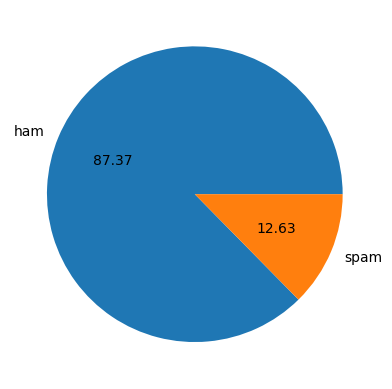

In [100]:
# we can represent it using matplotlib
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [101]:
# From the above data Distribution 12% spam and 87% not spam we knew that the data is imbalanced

In [102]:
# We can perform additional analysis by counting no of words, letters and sentences in the message
# for this we use nltk library natural language tool kit
!pip install nltk

In [103]:
import nltk

In [104]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [105]:
df['num_characters']= df['Text'].apply(len) # gives no of characters in each row

In [106]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x))) # this tokenizes based on the words

In [108]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [109]:
# now let's get no of sentences
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [110]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [111]:
# let's analyze the columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
# let's describe separate the ham and spam messages
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe() # ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe() # spam messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

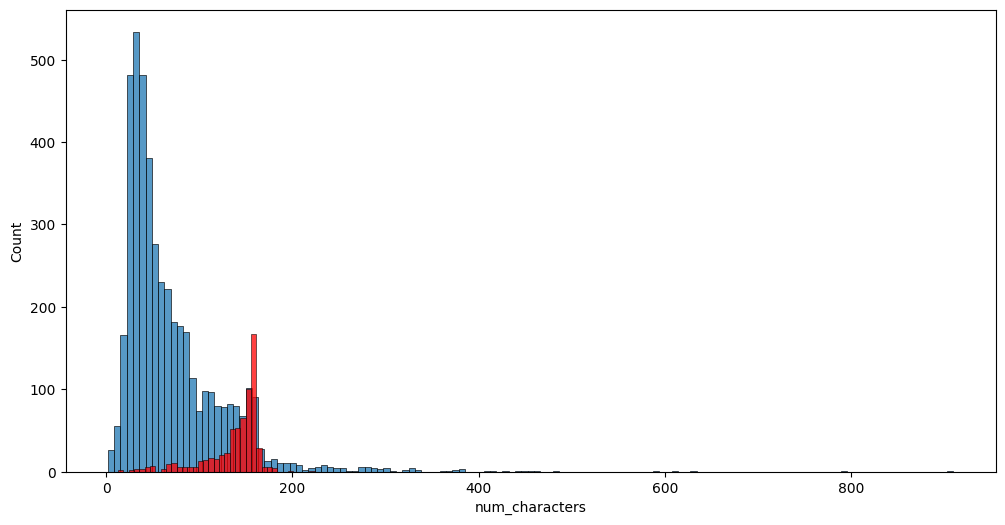

In [114]:
import seaborn as sns # importing seaborn to plot histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color = 'red')
# By analyzing the below histograms we can see that no of characters count in a spam message are more.

<Axes: xlabel='num_words', ylabel='Count'>

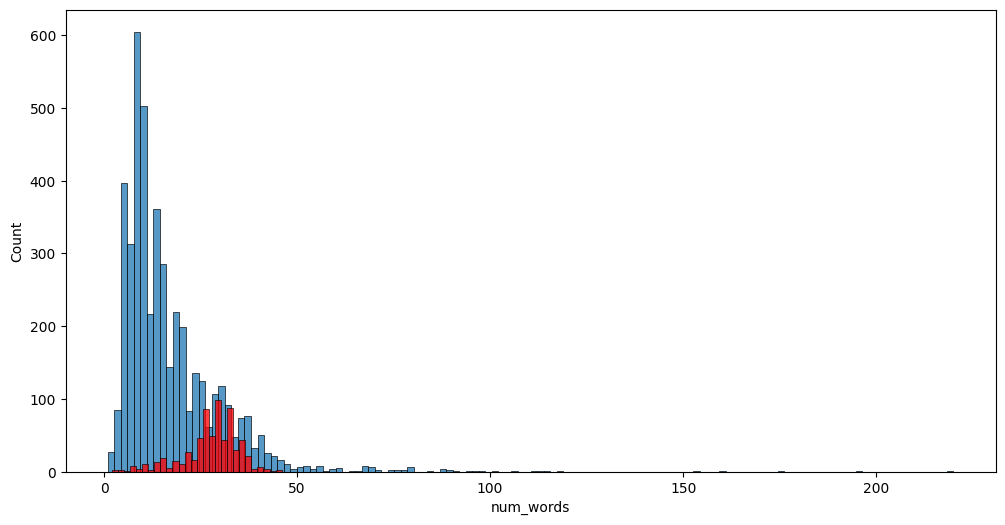

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color = 'red')
# By analyzing the below histograms we can see that spam messages are made up of more no of words_count.

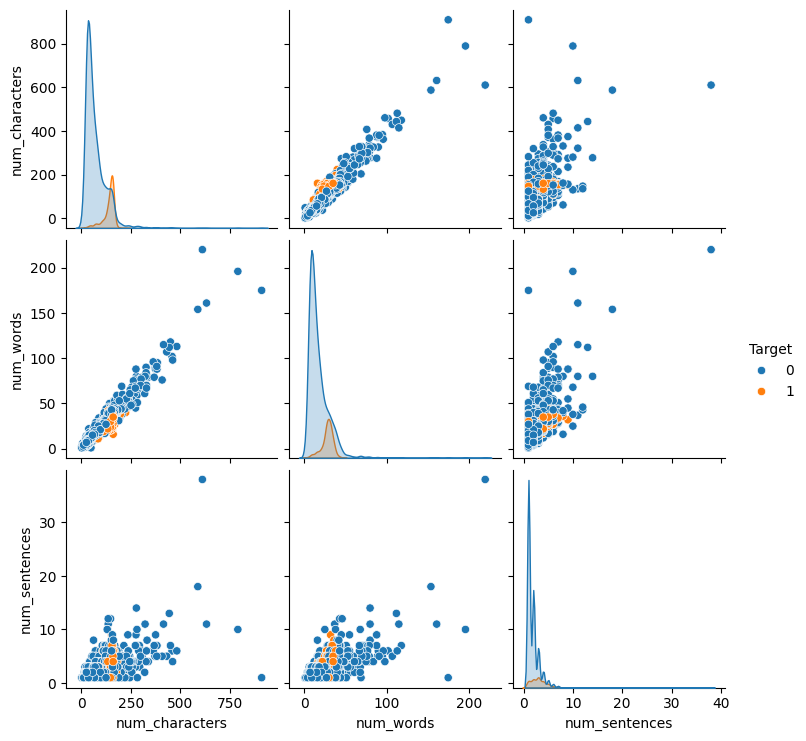

In [116]:
# relationships of the columns with each other
sns.pairplot(df,hue='Target')

<Axes: >

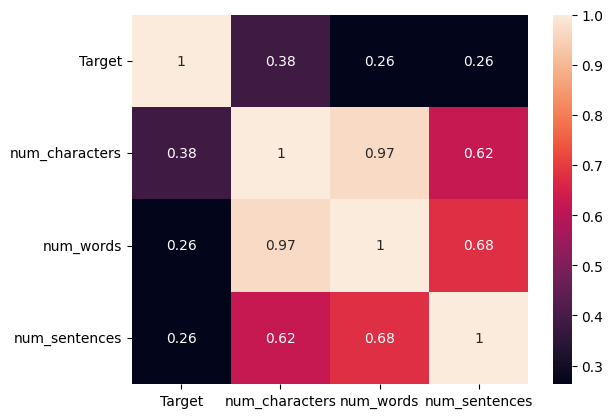

In [117]:
# let's generate a heatmap to see the correlation between the columns
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(),annot=True)

##**3.Data Preprocessing**
  *   Lower case
  *   Tokenization
  *   Removing Special Characters
  *   Removing stop words and punctuation
  *   Stemming

In [118]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
# To remove stop words we will first see list of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english') # stopwords are the words that doesn't contribute in the meaning of sentence but invovled in sentence structure

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [120]:
# stemming convert the words into their base form
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [121]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  # to remove special characters
  y = []
  for i in text:
    if i.isalnum():
       y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # Now let's do stemming
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [122]:
transform_text('Hi how are you Ali? I loved her ! What I got in response')

'hi ali love got respons'

In [123]:
# Now let's apply transform text function on the entire column
df['Transformed_text'] = df['Text'].apply(transform_text)

In [124]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
# let's generate a word cloud A word will enlarge the words that are used the most
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=1000, background_color='white')

In [126]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))

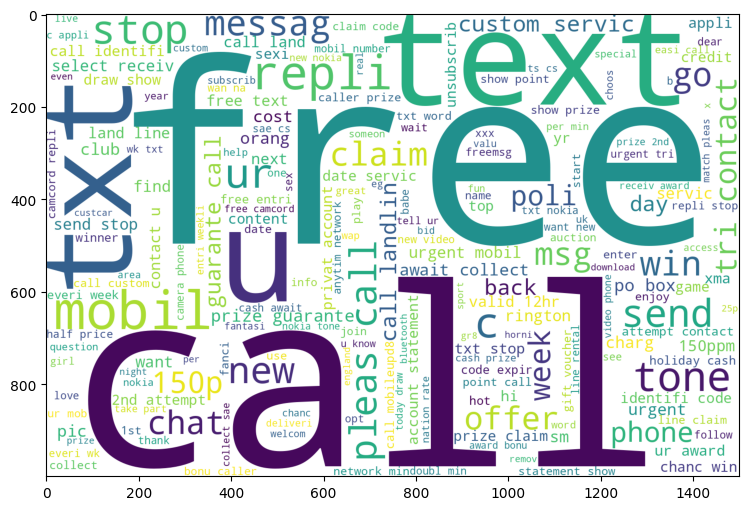

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=" "))

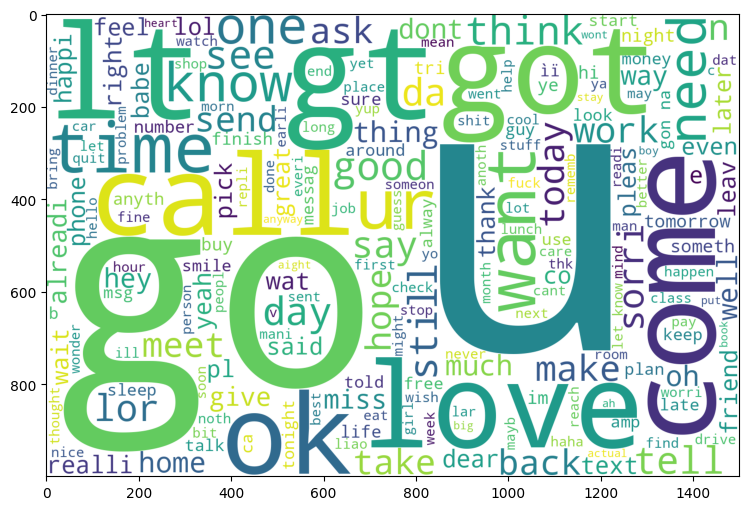

In [129]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [130]:
# Let's extract top 30 words in spam messges
spam_corpus = []
for msg in df[df['Target']==1]['Transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)




In [131]:
len(spam_corpus) # now this contains all the words that belong to spam messages

9939

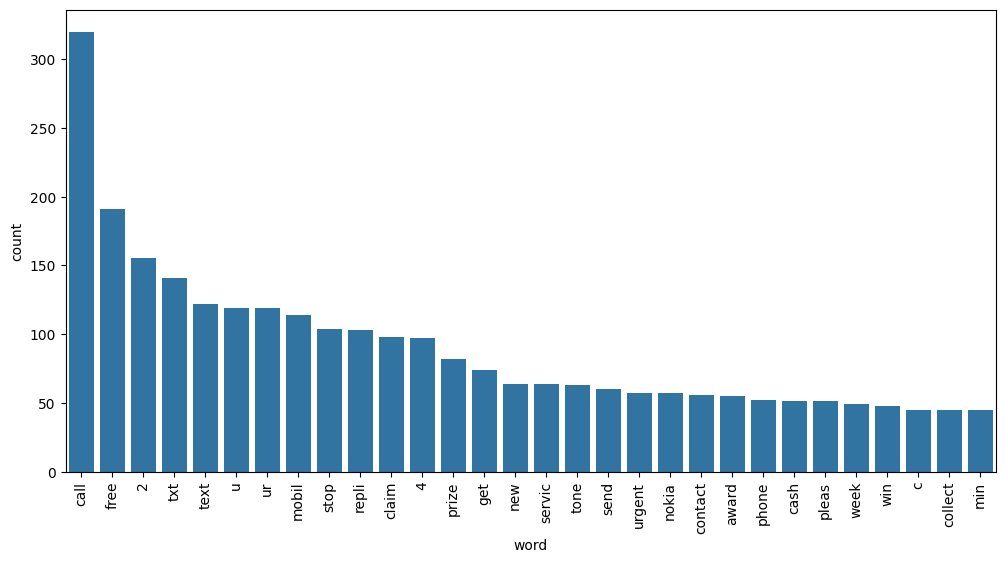

In [132]:
# By doing all this EDA we develop better understanding so that we can interpret the ML we develop
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
# Convert to DataFrame with proper column names
common_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.show()

In [133]:
# Let's extract top 30 words in ham messges
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)



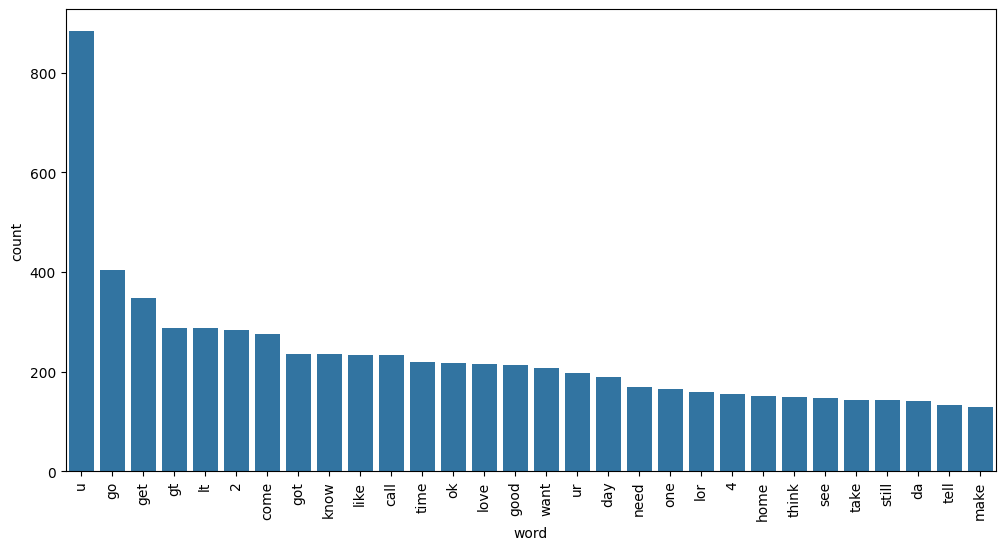

In [134]:
common_words = Counter(ham_corpus).most_common(30)
# Convert to DataFrame with proper column names
common_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.show()

##4. Model Building

In [162]:
# we will use Naive algorithm as it is the most suitable for text generally
# All our ML models accept data in numerical format so we have to vectorize our data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() # bag of words
# let's try tdidf
tfidf = TfidfVectorizer(max_features=3000) # Now let's add max features we can try different values and choose the ones that gives us the best result
# we can try feature scaling as well but that doesn't gives us the most suitable results


In [163]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [164]:
X.shape

(5169, 3000)

In [165]:
y = df['Target'].values

In [166]:
y.shape

(5169,)

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) # currently assigning 20% to the test data

In [169]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # we don't know which will perform better so we import all of them
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [170]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [171]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [172]:
# Checking Multimonal
# By changing vectorization method to tfidf our precision score improves
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [173]:
# We have see that bernouli is giving the most accuracy -- our vectorization method is bag of words
# By changing vectorization method to tfidf our precision score improves
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [174]:
# Now we can do experiments with our model by using different algorithms and check which one of them gives us the better results
# we can also play with the feature scaling, max features in vectorizer etc
# We keep on checking different techniques until we get a suitable option.

# Till now tfidf with MNB gives us the best result



In [175]:
# importing all algorithms -- we will check the performance for all of them
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [176]:
# using parameters values to the best of knowledge
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [177]:
# A dictionary so that we can run all the algorithms using a loop
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [178]:
# A function that will train the model based on the given algorithm and return the precision and accuracy scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [179]:
# first let's check on svc
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [180]:
# Now let's calculate for all of the algorithms
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [181]:
# By analyzing all the algorithms we have seen that Naive base MNB is performing better
# we can play a little bit using voiting and stacking techniques
# Voting is used to combine multiple algorithms with equal weightage
# Stackign is combining multiple algorithms with specified weightage
# By observing we have seen that the performance is not improved hence we will go with Naive base with multimonal
# The NB accuracy improves using max_features !

In [182]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [183]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [184]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [185]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.965184
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


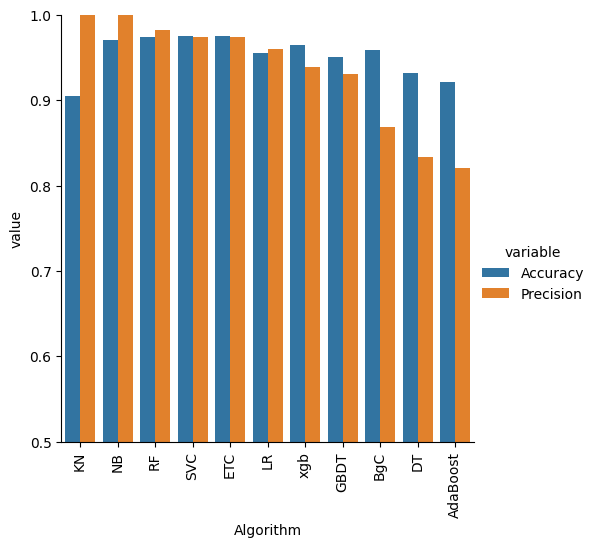

In [186]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5) # Just to get better analysis of what's going on
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [188]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [189]:
new_df # cuz I run all the cells again the previous Accuracy and precision also changed

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000
6,xgb,0.965184,0.939655,0.965184,0.939655
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333


In [190]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))